<a href="https://colab.research.google.com/github/sahil301290/TSS2022-ThaparSummerSchool/blob/main/29Jun2022_Face_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Following three tasks are to be done:**

## **1. Facial Similarity using Cosine Similarity**

## **2. Facial Recognition using One Shot Learning**

## **3. Testing on Video of Friends TV Series**

###Getting System Information

In [1]:
!nvidia-smi

Thu Jun 23 08:42:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

###Import all required libraries

In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

###Unzipping the dataset

In [3]:
!unzip -q face_recognition.zip

###Define the CNN Model

In [4]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

### **Load our VGG Face Weights**

We don't need to train our model if we can get the already trained 'weights'.

In [5]:
#you can download the pretrained weights from the following link 
#https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
#or you can find the detailed documentation https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/

!gdown --id 14eHppxprE1sCWmnjQ7LuijhAZQlb_Quz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=14eHppxprE1sCWmnjQ7LuijhAZQlb_Quz
To: /content/vgg_face_weights.h5
100% 580M/580M [00:08<00:00, 65.9MB/s]


In [6]:
model.load_weights('vgg_face_weights.h5')

## **1. Facial Similarity using Cosine Similarity**

![Image of Cosine Similarity](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/cosine.JPG)
![Image of Cosine Similarity Formula](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/cosinesim.JPG)

In [7]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

# Our model that outputs the 2,622 embedding vector
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

## **Verify Facial Similarity**

#### **Define our verifyFace function where we load to images of faces and compare them.**

We set **epsilon** to be the threshold of whether our two faces are the same person. Setting a lower value makes it more strict with our face matching.

In [8]:
epsilon = 0.40

def verifyFace(img1, img2):
    # Get embedding/encoding for face1 and face2
    img1_representation = vgg_face_descriptor.predict(preprocess_image('./face_recognition/training_faces/%s' % (img1)))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image('./face_recognition/training_faces/%s' % (img2)))[0,:]
    
    # Calculate the cosine similarity between the two embeddings
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('./face_recognition/training_faces/%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('./face_recognition/training_faces/%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    
    print("Cosine similarity: ",cosine_similarity)
    
    # If similarity score is less than the epsilon threshold
    if(cosine_similarity < epsilon):
        print("They are same person")
    else:
        print("They are not same person!")

### **Let's a run a few tests**

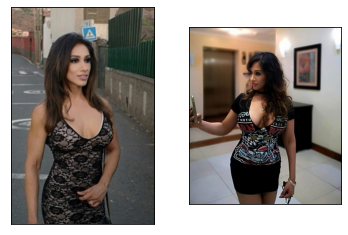

Cosine similarity:  0.1402428150177002
They are same person


In [9]:
# Let's compare two faces of the same person
verifyFace("Nidia_1.jpg", "Nidia_2.jpg")

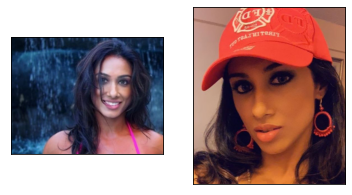

Cosine similarity:  0.5172353684902191
They are not same person!


In [10]:
# Let's now try it on 2nd picture of the same person
verifyFace("Nidia_4.jpg", "Nidia_6.jpg")

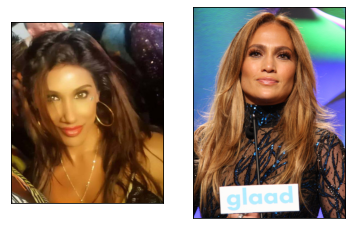

Cosine similarity:  0.4772374629974365
They are not same person!


In [11]:
# Now let's compare her face to Jennifer Lopez
verifyFace("Nidia_5.jpg", "jlo.jpg")

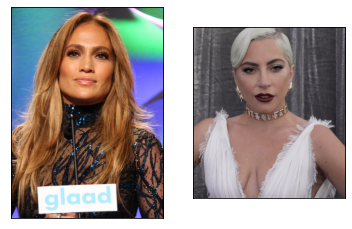

Cosine similarity:  0.47297167778015137
They are not same person!


In [12]:
# And now Jennifer Lopez with Lady Gaga
verifyFace("jlo.jpg", "ladygaga.jpg")

# **2. Facial Recognition with One Shot Learning**
### **Extract faces from pictures of people**

#### **Instrutions:**
1. Place photos of people (one face visible) in the folder called "./people"
2. Replace my photo titled "sahil.jpg" with a piture of your face for testing on a webcam
3. Faces are extracted using the haarcascade_frontalface_default detector model
4. Extracted faces are placed in the folder called "./group_of_faces"
5. We are extracting the faces needed for our one-shot learning model, it will load 5 extracted faces

In [13]:
!gdown --id 1_X-V1Lp6qMAl_-9opsseieprD3Lhdq8U
!unzip -qq haarcascades.zip
!rm -rf people/.DS_Store

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_X-V1Lp6qMAl_-9opsseieprD3Lhdq8U
To: /content/haarcascades.zip
100% 276k/276k [00:00<00:00, 109MB/s]


In [14]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 8):
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()

['ladygaga.jpg', 'sahil.jpg', 'nidia2.jpg', 'jlo.jpg']
Collected 4 images


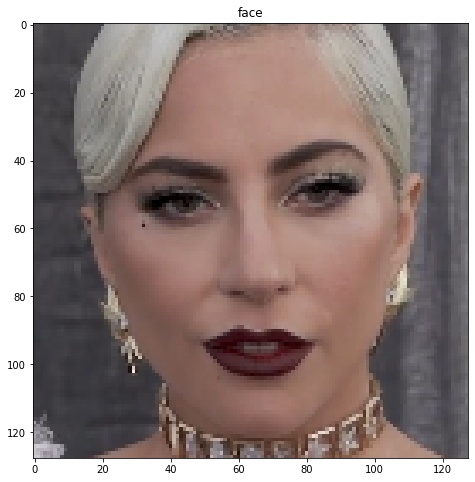

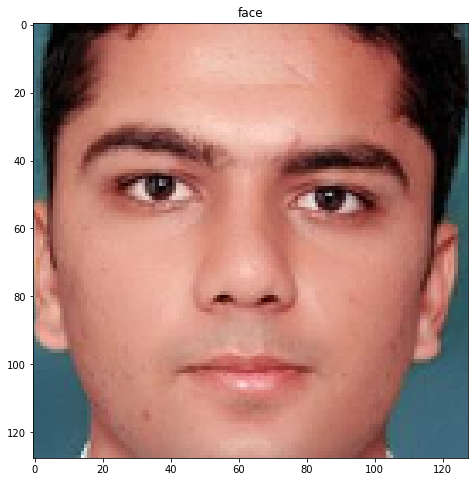

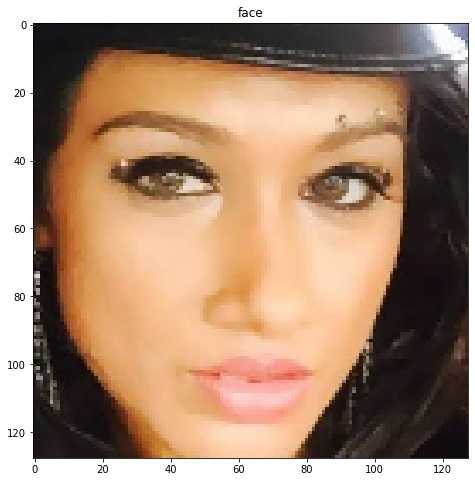

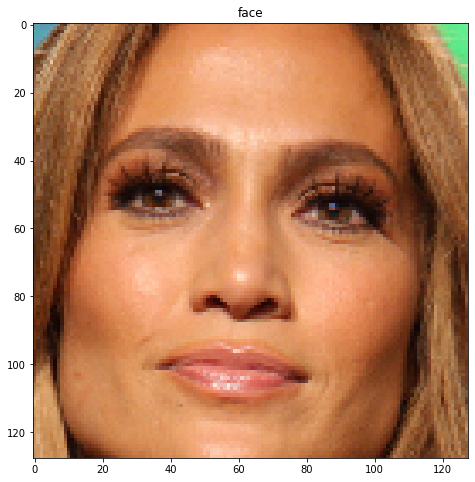

In [15]:
# The code below extracts faces from images and places them in the folder
import os
from os import listdir
from os.path import isfile, join

# Create a function to setup the directories we'll be storing our images
def makedir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None
    else:
        pass

# Loading out HAARCascade Face Detector 
face_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Directory of image of persons we'll be extracting faces frommy
mypath = "./face_recognition/people/"
image_file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(image_file_names)
print("Collected " + str(len(image_file_names)) + " images")
makedir("./face_recognition/group_of_faces/")

for image_name in image_file_names:
    person_image = cv2.imread(mypath+image_name)
    face_info = face_detector.detectMultiScale(person_image, 1.3, 5)
    for (x,y,w,h) in face_info:
        face = person_image[y:y+h, x:x+w]
        roi = cv2.resize(face, (128, 128), interpolation = cv2.INTER_CUBIC)
    
    path = "./face_recognition/group_of_faces/" + "face_" + image_name
    cv2.imwrite(path, roi)
    imshow("face", roi)

### **Load our VGGFaceModel**
- This block of code defines the VGGFace model (which we use later) and loads the model

In [16]:
#you can find the documentation of this code from the following link: https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/

import numpy as np
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from os import listdir

def preprocess_image(image_path):
    """Loads image from path and resizes it"""
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

#you can download pretrained weights from https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
from tensorflow.keras.models import model_from_json
model.load_weights('vgg_face_weights.h5')

vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

model = vgg_face_descriptor

print("Model Loaded")

Model Loaded


## **Test model using your Webcam**
This code looks up the faces you extracted in the "group_of_faces" folder and uses the similarity (Cosine Similarity) to detect which faces is most similar to the one being extracted with your webcam.

In [17]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


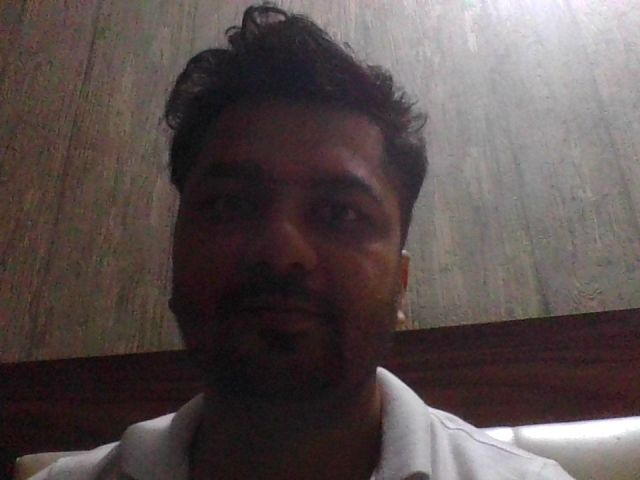

In [18]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Face representations retrieved successfully


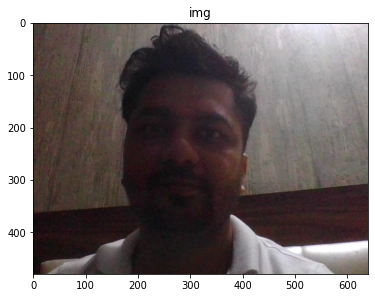

In [19]:
#points to your extracted faces
people_pictures = "./face_recognition/group_of_faces/"

all_people_faces = dict()

for file in listdir(people_pictures):
    person_face, extension = file.split(".")
    try:
      all_people_faces[person_face] = model.predict(preprocess_image('./group_of_faces/%s.jpg' % (person_face)))[0,:]
    except:
      pass

print("Face representations retrieved successfully")

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

img = cv2.imread('photo.jpg')
faces = face_detector.detectMultiScale(img, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image
    detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
    detected_face = cv2.resize(detected_face, (224, 224)) #resize to 224x224

    img_pixels = image.img_to_array(detected_face)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels /= 255

    captured_representation = model.predict(img_pixels)[0,:]

    found = 0
    for i in all_people_faces:
        person_name = i
        representation = all_people_faces[i]

        similarity = findCosineSimilarity(representation, captured_representation)
        if(similarity < 0.35):
            cv2.putText(img, person_name[5:], (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            found = 1
            break

    #connect face and text
    cv2.line(img,(int((x+x+w)/2),y+15),(x+w,y-20),(255, 0, 0),1)
    cv2.line(img,(x+w,y-20),(x+w+10,y-20),(255, 0, 0),1)

    if(found == 0): #if found image is not in our people database
        cv2.putText(img, 'unknown', (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

imshow('img',img)

## **3. Test on video from the Friends TV show**

Since we're using the Friends TV Series characters, let's extract the faces from the images I placed in the "./friends" folder

In [20]:
#!find . -name '.DS_Store' -type f -delete

Collected image names


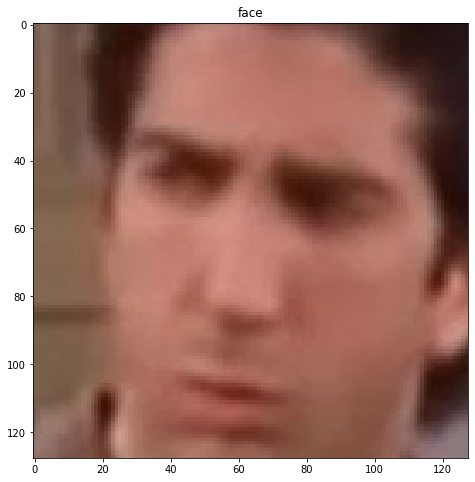

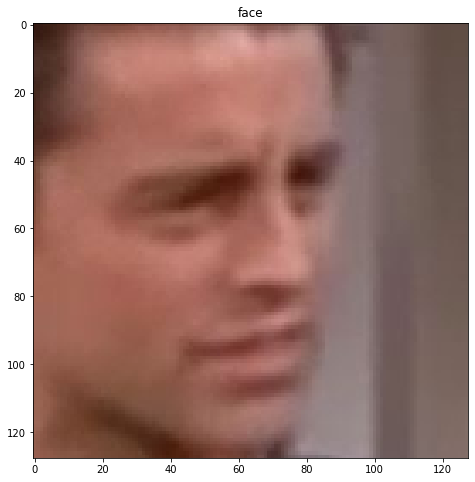

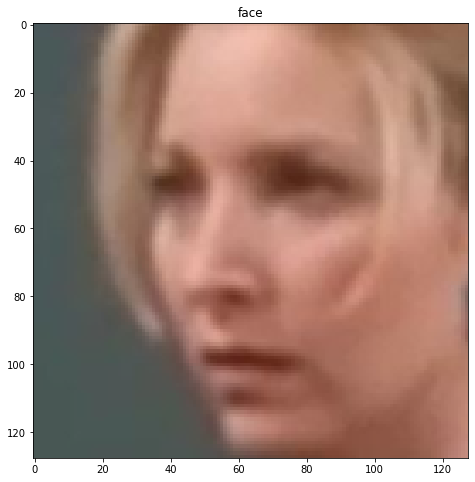

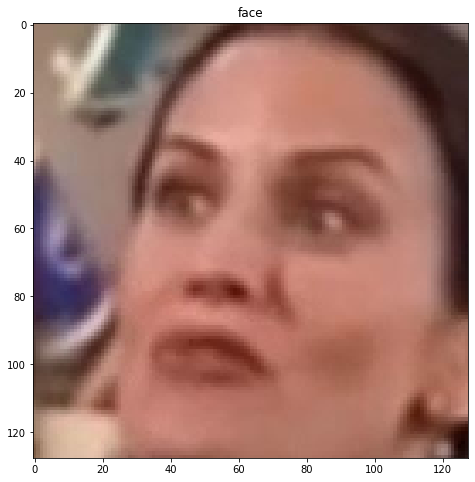

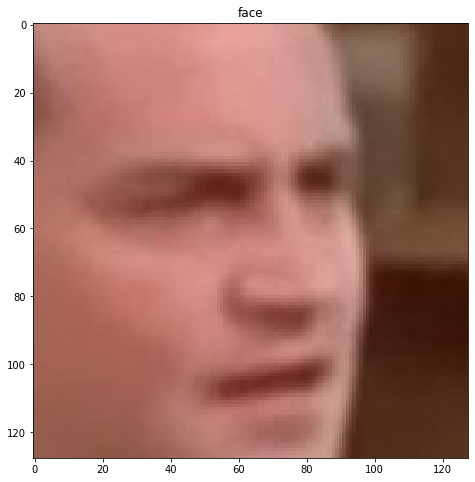

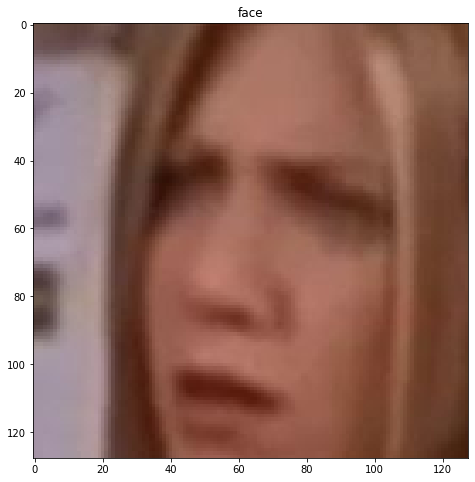

In [21]:
from os import listdir
from os.path import isfile, join
import cv2

# Loading out HAARCascade Face Detector 
face_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')

# Directory of image of persons we'll be extracting faces frommy
mypath = "./face_recognition/friends/"
image_file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print("Collected image names")
makedir("friends_faces/")

for image_name in image_file_names:
    person_image = cv2.imread(mypath+image_name)
    face_info = face_detector.detectMultiScale(person_image, 1.3, 5)
    for (x,y,w,h) in face_info:
        face = person_image[y:y+h, x:x+w]
        roi = cv2.resize(face, (128, 128), interpolation = cv2.INTER_CUBIC)
    path = "friends_faces/" + "face_" + image_name 
    cv2.imwrite(path, roi)
    imshow("face", roi)

Again, we load our faces from the "friends_faces" directory and we run our face classifier model our test video

Face representations retrieved successfully


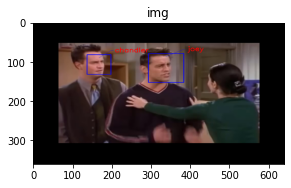

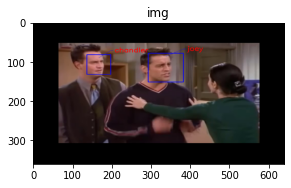

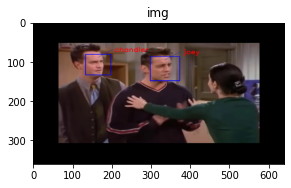

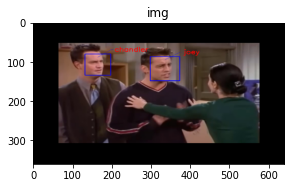

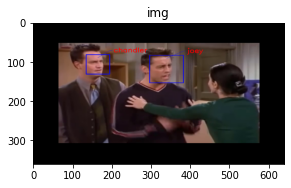

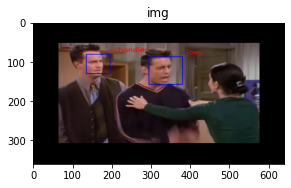

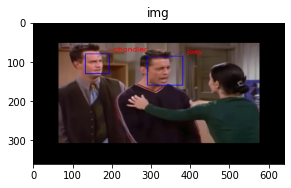

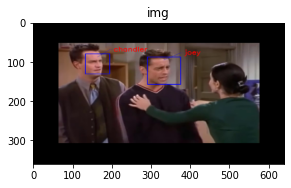

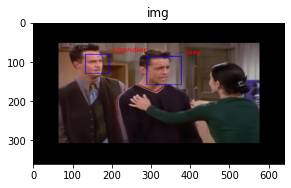

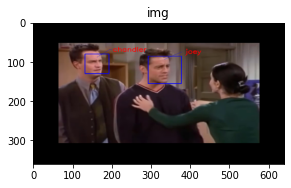

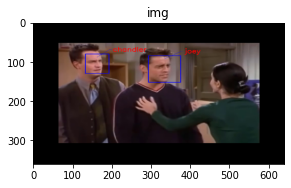

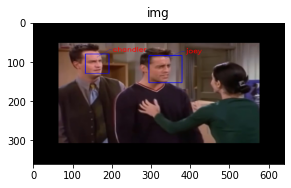

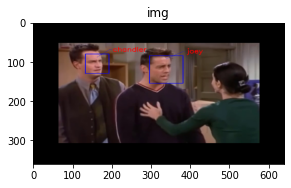

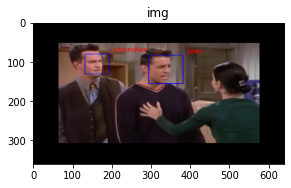

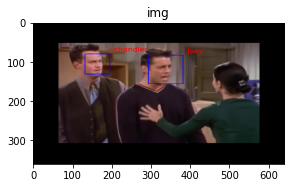

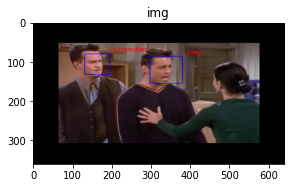

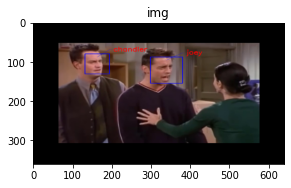

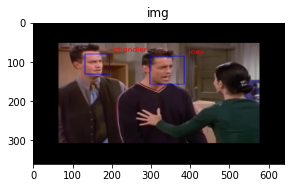

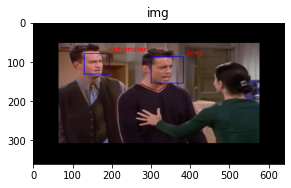

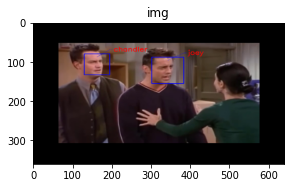

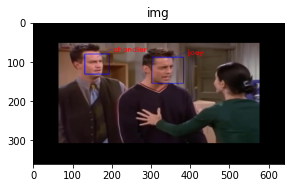

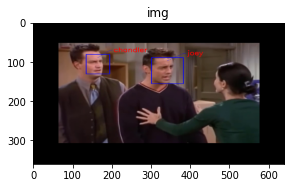

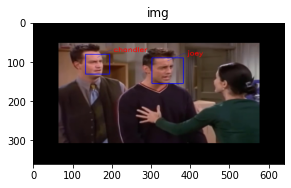

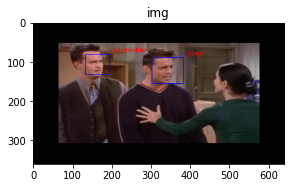

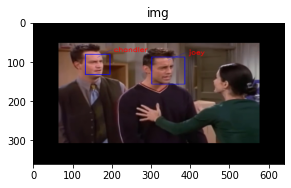

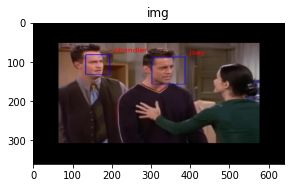

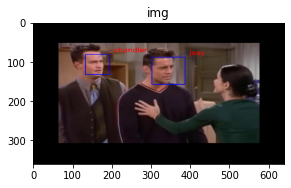

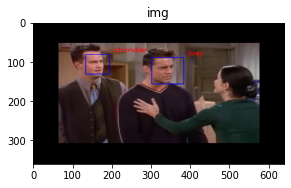

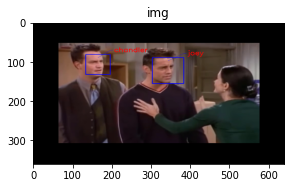

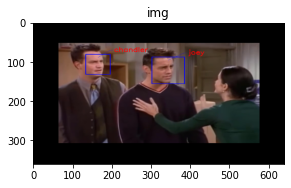

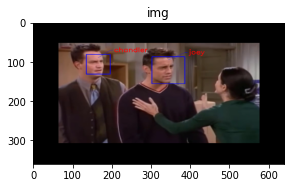

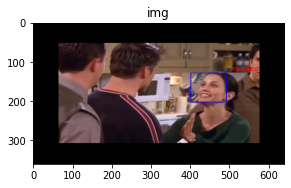

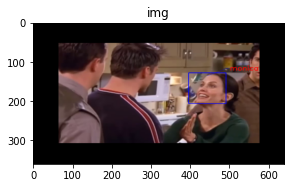

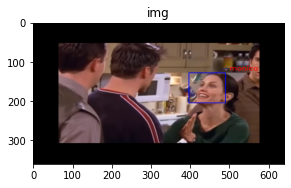

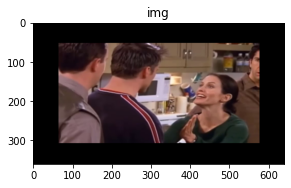

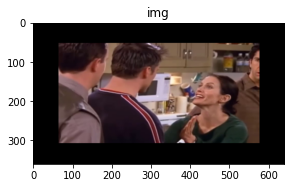

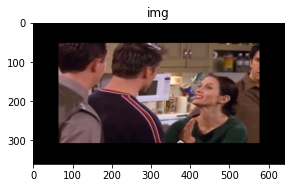

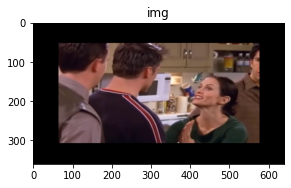

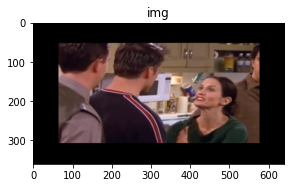

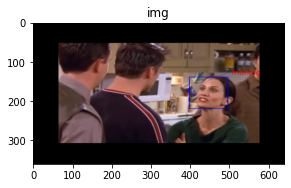

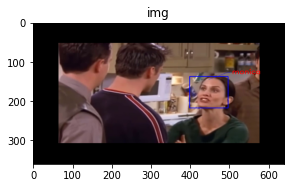

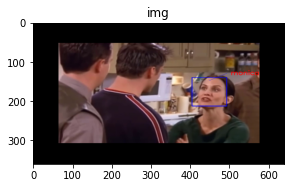

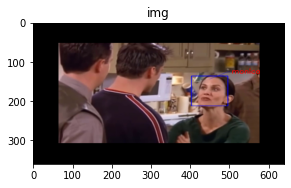

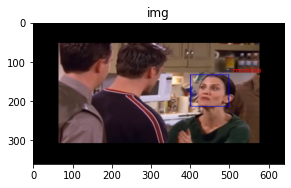

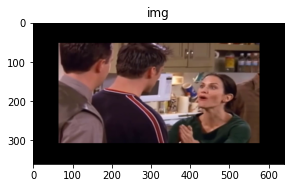

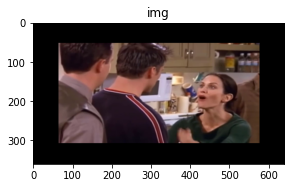

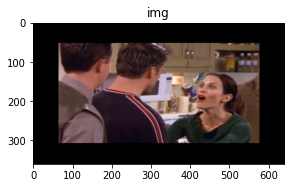

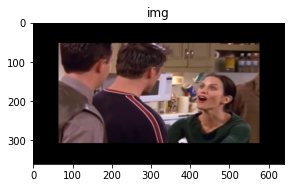

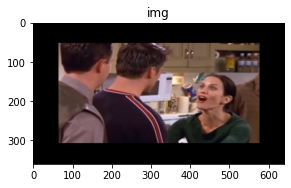

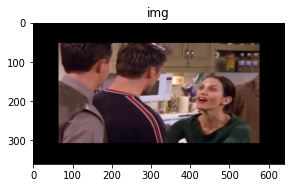

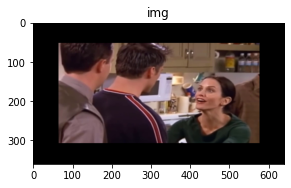

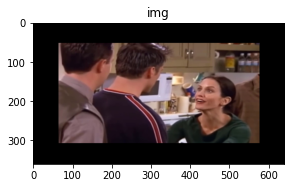

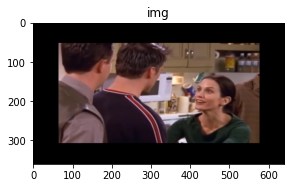

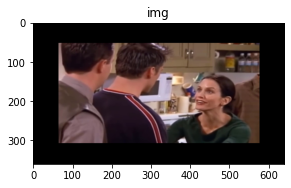

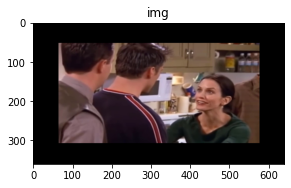

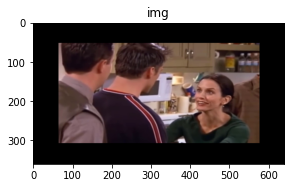

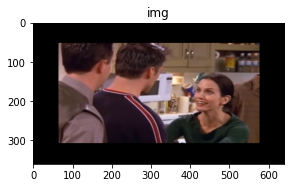

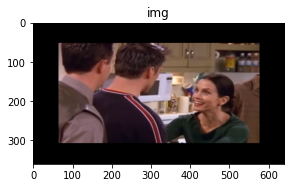

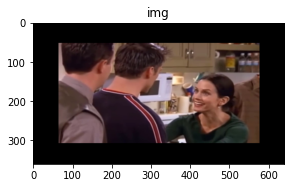

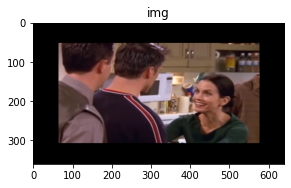

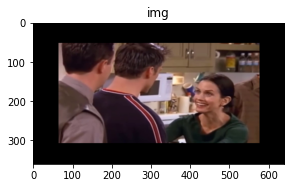

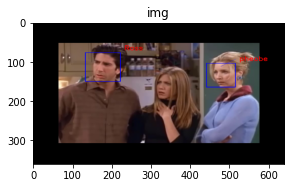

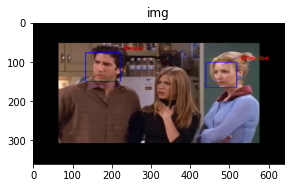

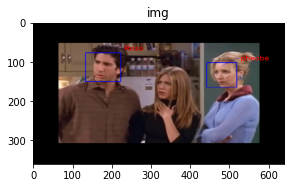

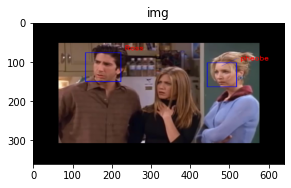

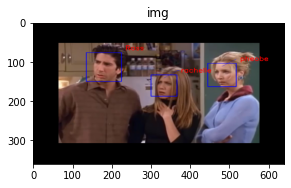

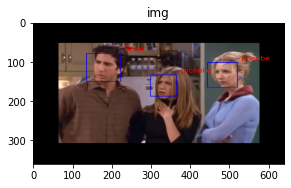

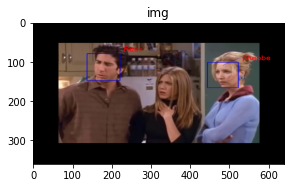

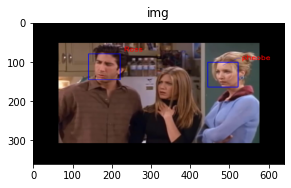

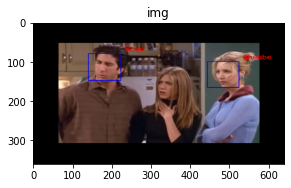

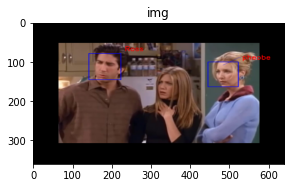

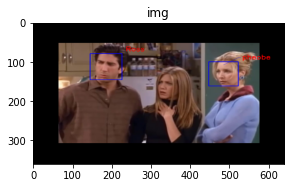

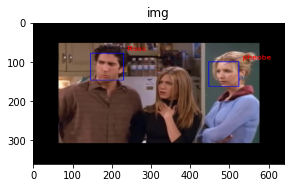

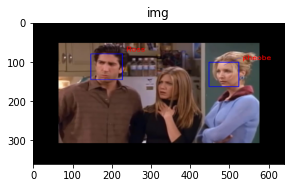

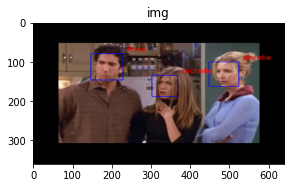

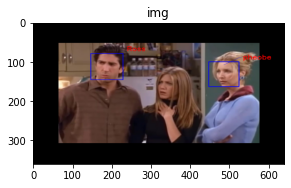

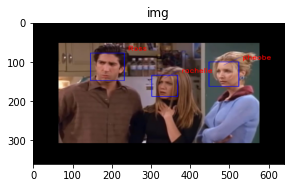

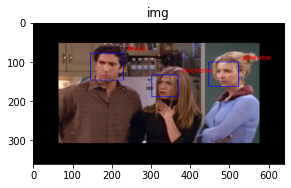

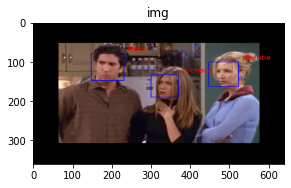

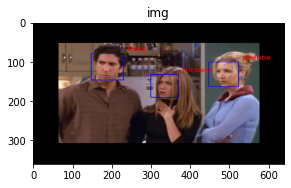

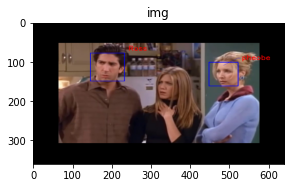

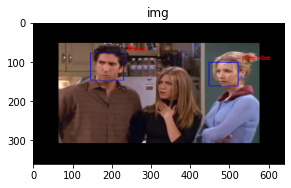

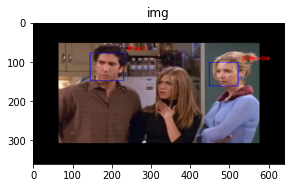

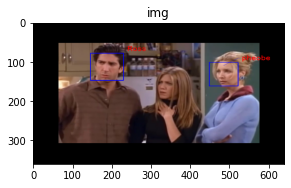

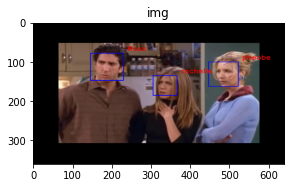

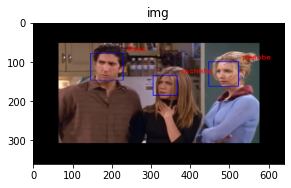

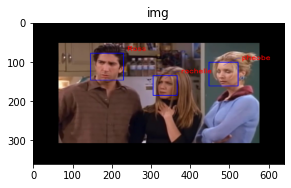

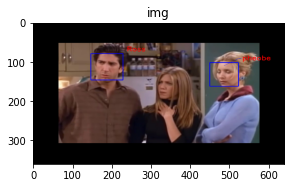

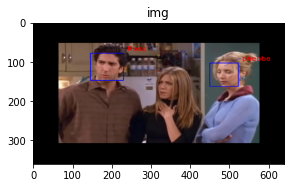

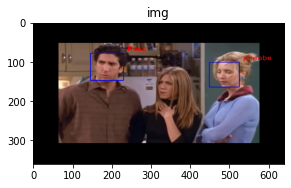

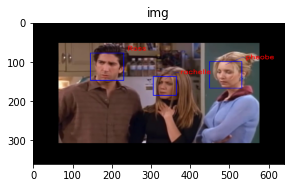

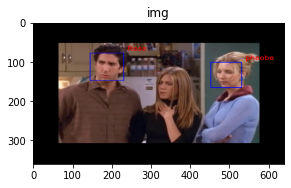

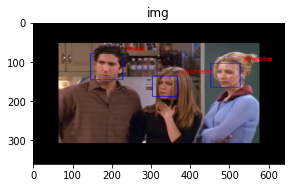

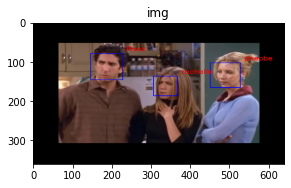

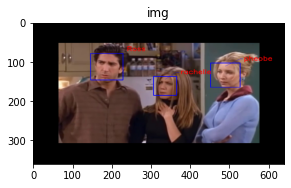

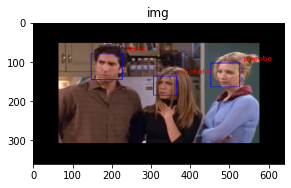

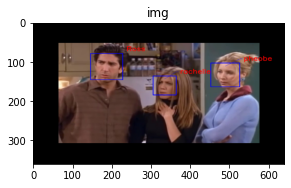

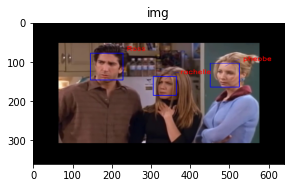

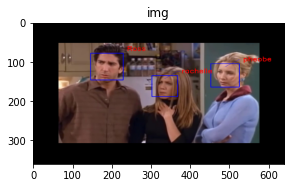

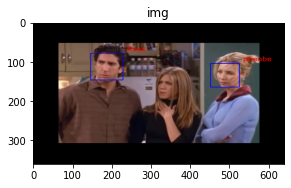

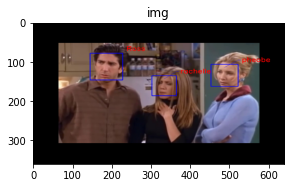

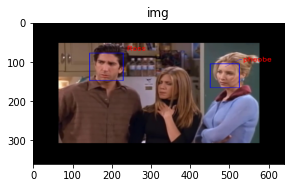

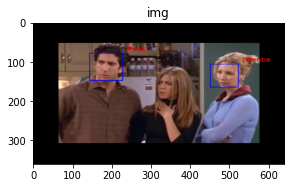

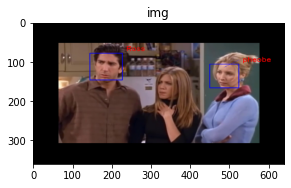

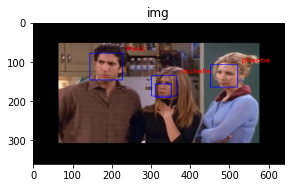

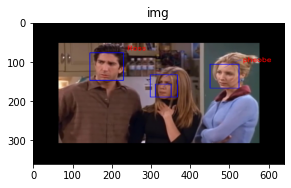

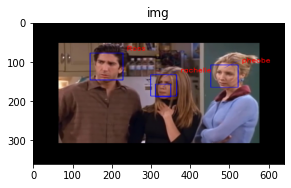

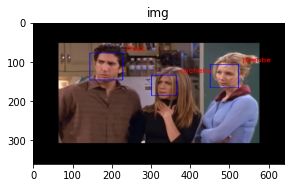

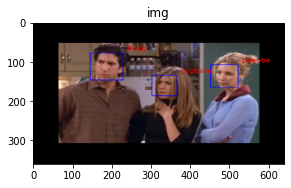

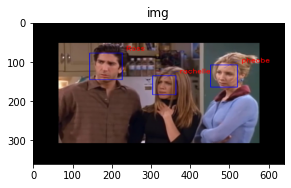

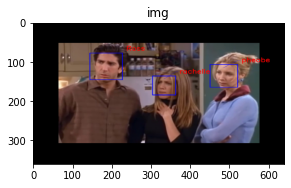

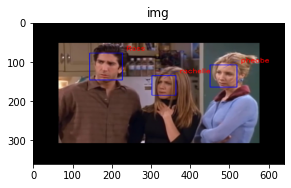

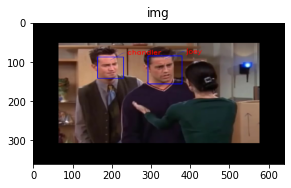

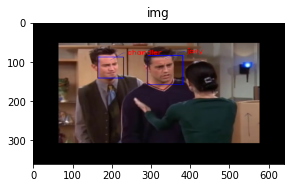

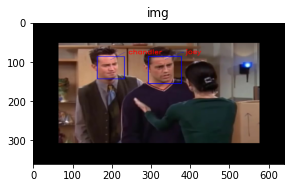

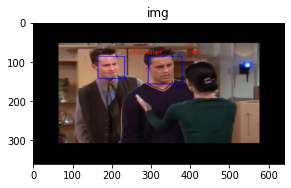

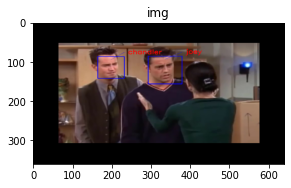

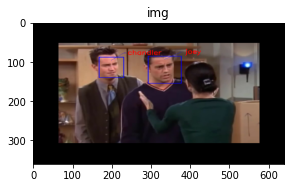

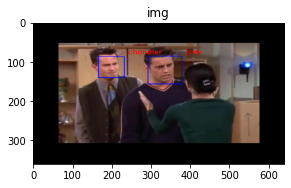

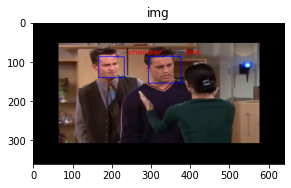

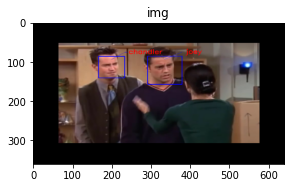

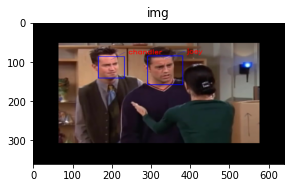

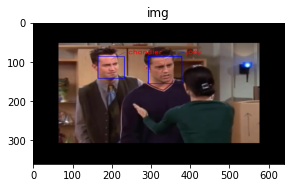

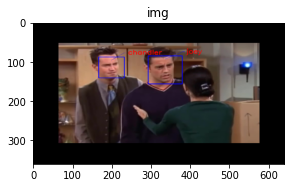

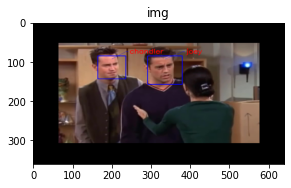

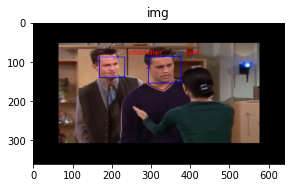

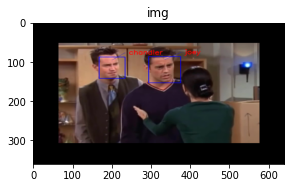

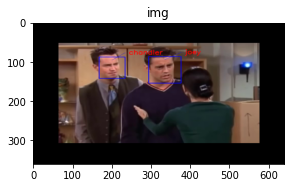

In [22]:
#points to your extracted faces
people_pictures = "./friends_faces/"

all_people_faces = dict()

for file in listdir(people_pictures):
    person_face, extension = file.split(".")
    try:
      all_people_faces[person_face] = model.predict(preprocess_image('./face_recognition/friends_faces/%s.jpg' % (person_face)))[0,:]
    except:
      pass
      
print("Face representations retrieved successfully")

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

cap = cv2.VideoCapture('./face_recognition/Friends.mp4')
frame_count = 0

# Get the height and width of the frame (required to be an integer)
w = int(cap.get(3)) + 200
h = int(cap.get(4)) + 200

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('friends_face_recognition.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

while(True):
  ret, img = cap.read()
  if ret:
    #img = cv2.resize(img, (320, 180)) # Re-size video to as smaller size to improve face detection speed
    img = cv2.copyMakeBorder(img, 100, 100, 100, 100, cv2.BORDER_CONSTANT, value=[0,0,0])
    faces = face_detector.detectMultiScale(img, 1.3, 5)
    frame_count+=1
    for (x,y,w,h) in faces:
      if w > 13: 
          cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image

          detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
          detected_face = cv2.resize(detected_face, (224, 224)) #resize to 224x224

          img_pixels = image.img_to_array(detected_face)
          ls = image.img_to_array(detected_face)
          img_pixels = np.expand_dims(img_pixels, axis = 0)
          img_pixels /= 255

          captured_representation = model.predict(img_pixels)[0,:]

          found = 0
          for i in all_people_faces:
            person_name = i
            representation = all_people_faces[i]

            similarity = findCosineSimilarity(representation, captured_representation)
            if(similarity < 0.30):
                cv2.putText(img, person_name[5:], (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                found = 1
                break

            #connect face and text
            cv2.line(img,(int((x+x+w)/2),y+15),(x+w,y-20),(255, 0, 0),1)
            cv2.line(img,(x+w,y-20),(x+w+10,y-20),(255, 0, 0),1)

    imshow('img',cv2.resize(img, (640, 360)))
    # Write the frame into the file 'output.avi'
    out.write(img)
  else:
    break

cap.release()
out.release()